In [8]:
import boto3
import pandas as pd; pd.set_option('display.max_columns', 100)
import numpy as np

s3 = boto3.resource('s3')
bucket_name = 'grant-gonnerman-data-445'
bucket = s3.Bucket(bucket_name)

file_key = 'Real_Estate.csv'

bucket_object = bucket.Object(file_key)
file_object = bucket_object.get()
file_content_stream = file_object.get('Body')

# reading data file
house_price = pd.read_csv(file_content_stream)
house_price.head()

,No,transaction_date,house_age,distance_to_the_nearest_MRT_station,number_of_convenience_stores,latitude,longitude,house_price_of_unit_area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [9]:
##dropping No
house_price = house_price.drop(columns = ['No', 'transaction_date'], axis = 1)
house_price.head()

,house_age,distance_to_the_nearest_MRT_station,number_of_convenience_stores,latitude,longitude,house_price_of_unit_area
0,32.0,84.87882,10,24.98298,121.54024,37.9
1,19.5,306.59470,9,24.98034,121.53951,42.2
2,13.3,561.98450,5,24.98746,121.54391,47.3
3,13.3,561.98450,5,24.98746,121.54391,54.8
4,5.0,390.56840,5,24.97937,121.54245,43.1


In [10]:
from sklearn.model_selection import train_test_split

# defining input and target variable
x = house_price.drop(columns = 'house_price_of_unit_area', axis = 1)
y = house_price['house_price_of_unit_area']

# spliting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [12]:
from sklearn.linear_model import LinearRegression

# building the lm
lm_md = LinearRegression().fit(x_train, y_train)

In [13]:
lm_pred = lm_md.predict(x_test)
lm_pred

array([25.89803642, 39.04789238, 40.87293173, 29.96710764, 14.22604079,
       30.34441821, 22.82490262, 40.44786143, 40.33250104, 35.97070726,
       39.76299951, 34.11534437, 24.61993795, 30.41835531, 48.38299514,
       46.72150449, 45.31447413, 14.27533219, 47.03436163, 42.20219244,
       44.19429602, 47.05900733, 41.4569516 , 14.61085116, 40.83667002,
       49.58721712, 24.91924056, 37.31380962, 49.12875484, 45.01758042,
       49.58721712, 13.48341164, 36.42984338, 43.9149445 , 32.8947652 ,
       13.84056428, 49.58721712, 42.83925245, 41.69449251, 32.27721732,
       42.20219244, 48.21724606, 47.62865652, 40.13902806, 46.18797525,
       32.61332043, 43.44706162, 42.22248063, 42.47869461, 44.98336478,
       14.96541185, 36.39853124, 31.77140598, 22.46281368, 47.77653073,
       31.7220712 , 39.60527396, 42.22085065, 48.04472615, 36.08242544,
       38.98184581, 47.60544653, 46.78950784, 47.97349877, 36.57162267,
       38.07658888, 38.86801675, 37.32858004, 34.46666968, 39.10

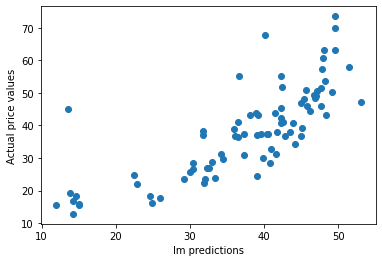

In [16]:
import matplotlib.pyplot as plt

plt.scatter(lm_pred, y_test)
plt.xlabel('lm predictions')
plt.ylabel('Actual price values')
plt.show()

In [17]:
# computing the mse
np.mean((y_test - lm_pred)**2)

73.66574713604477